# 初期設定

In [1]:
!pip install japanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 12.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize_matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=712192b30a7dcf7ed240333b0bcf37b35f87e83510a23acb55ae2d3ea7e552e3
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize_matplotlib


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib
import random
import math
from google.colab import drive
from google.colab import files
from scipy.stats import norm

In [3]:
#シミュレーション回数
N = 10000
#レースのサンプリング数
n = 10

In [4]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/SAINT

Mounted at /content/drive
/content/drive/MyDrive/SAINT


# 関数定義

In [6]:
def race_choicer(df,n):
    #ランダムなレースをn個選択
    #df["レースID"] =  df.iloc[:,13].astype(str) +","+ df.iloc[:,1].astype(str) +","+ + df.iloc[:,10].astype(str)
    race_numbers = list(df['レースID'].unique())
    sim_num_list = random.sample(race_numbers, n)
    return sim_num_list

def simulate_hist(df,sim_num_list):
    race_times_all = [[] for _ in sim_num_list]
    for i in range(len(sim_num_list)):
        race_times_indv = {}
        sim_data = df[df['レースID'] == sim_num_list[i]]
        horse_num = list(sim_data['馬番'])
        plt.figure(figsize=(12, 7))
        for a in horse_num:
            mean = sim_data['平均'][sim_data['馬番'] == a].item()  # 平均
            std_dev = sim_data['分散'][sim_data['馬番'] == a].item()  # 標準偏差
            race_times_indv[a] = np.random.normal(mean, np.sqrt(std_dev), N)
            plt.hist(race_times_indv[a], bins=50, density=True, alpha=0.6, label=f'馬番 = {a}')
        race_times_all[i].append(race_times_indv)
        plt.legend(loc='upper right', bbox_to_anchor=(1, 1),fontsize = 15)
        plt.xlabel('補正タイム',fontsize = 20)
        plt.ylabel('確率密度',fontsize = 20)
        plt.title(sim_num_list[i],fontsize = 20)
        plt.rcParams["font.size"] = 15
        plt.grid(True)
        plt.show()
    return race_times_all

def simulate_hist_top(df,sim_num_list):
    race_times_all = [[] for _ in sim_num_list]
    for i in range(len(sim_num_list)):
        race_times_indv = {}
        sim_data = df[df['レースID'] == sim_num_list[i]]
        # "平均"で昇順ソート
        #sim_data = sim_data.sort_values(by='平均')
        # 上から3つの行を取り出す
        sim_data = sim_data.head(2)
        horse_num = list(sim_data['馬番'])
        plt.figure(figsize=(10, 6))
        for a in horse_num:
            mean = sim_data['平均'][sim_data['馬番'] == a].item()  # 平均
            std_dev = sim_data['分散'][sim_data['馬番'] == a].item()  # 標準偏差
            race_times_indv[a] = np.random.normal(mean, np.sqrt(std_dev), N)
            plt.hist(race_times_indv[a], bins=50, density=True, alpha=0.6, label=f'馬番 = {a}')
        race_times_all[i].append(race_times_indv)
        plt.legend(loc='upper right', bbox_to_anchor=(1, 1),fontsize = 15)
        plt.xlabel('補正タイム',fontsize = 20)
        plt.ylabel('確率密度',fontsize = 20)
        plt.title(sim_num_list[i],fontsize = 20)
        plt.rcParams["font.size"] = 15
        plt.grid(True)
        plt.show()
    return race_times_all


def smallest(arr):
    smallest = np.argsort(arr)
    return smallest[:3]+1

def simulate_table(df,sim_num_list,race_times_all):
    columns3 = ['1st', '2nd', '3rd']
    count_df = []
    for i in range(len(sim_num_list)):
        race_df = pd.DataFrame(columns=columns3)
        count_df.append(race_df)
        sim_data = df[df['レースID'] == sim_num_list[i]]
        horse_num = list(sim_data['馬番'])
        for j in range(N):
            send_array = []
            for y in horse_num:  #yは馬番1,2,....max_y
                print(i,y,j)
                send_array.append(race_times_all[i][0][y])
            count_df[i].loc[j] = smallest(send_array)
            send_array = [0]*20
    return count_df

def tansyo(count_df):
    #1列目の各数字の出現割合を計算
    first_counts = count_df['1st'].value_counts(normalize=True)
    first_counts_df = first_counts.reset_index()
    first_counts_df.columns = ['1st', '確率']
    first_counts_df = first_counts_df.sort_values(by='1st', ascending=True).reset_index(drop=True)
    first_counts_df




In [8]:
df = pd.read_excel("/content/drive/MyDrive/SAINT/data/important/output_prop_20eps_a20.0_b0.05_c5.0_2023-11-21_13-50-50.xlsx",index_col = 0)

# 馬の選出

In [ ]:
df = pd.read_excel("/content/drive/MyDrive/SAINT/output20231122.xlsx",index_col = 0)

In [ ]:
df = pd.read_excel("/content/drive/MyDrive/SAINT/output20231207.xlsx")

In [ ]:
df

,場所,開催何日目,芝・ダート,距離,馬場状態,血統登録番号,斤量,基準タイム,補正タイム総合値_noleak,レース番号,馬番,レースID,rpr_逃げ,rpr_先行,rpr_中団,rpr_後方,平均,分散
65083,0,2,0,2000,2,2018102328,56.0,121.5232,120.9777,10,2,"20230107,中京,10",0.000000,0.115723,0.633789,0.250488,120.492769,3.723943
65084,0,2,0,2000,2,2017110029,58.0,121.5232,111.4251,10,3,"20230107,中京,10",0.000000,0.031250,0.507812,0.460938,120.820618,3.565383
65085,0,2,0,2000,2,2017106125,58.0,121.5232,115.0921,10,4,"20230107,中京,10",0.000000,0.000000,0.906250,0.093750,120.311960,3.765720
65086,0,2,0,2000,2,2018105131,58.0,121.5232,113.9256,10,5,"20230107,中京,10",0.000000,0.812500,0.000000,0.187500,120.207615,3.721814
65087,0,2,0,2000,2,2019105315,57.0,121.5232,116.9185,10,6,"20230107,中京,10",0.031250,0.593750,0.375000,0.000000,120.176549,3.726191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81349,8,8,1,1200,2,2017106394,58.0,73.4183,113.7347,12,12,"20230625,阪神,12",0.000488,0.000000,0.092773,0.906738,72.937004,3.567731
81350,8,8,1,1200,2,2018100985,58.0,73.4183,102.8269,12,13,"20230625,阪神,12",0.000000,0.062500,0.687500,0.250000,73.132756,3.478421
81351,8,8,1,1200,2,2019103040,56.0,73.4183,111.5644,12,14,"20230625,阪神,12",0.125000,0.843750,0.031250,0.000000,72.011199,3.829089
81352,8,8,1,1200,2,2019105860,56.0,73.4183,105.9772,12,15,"20230625,阪神,12",0.250000,0.718750,0.031250,0.000000,72.949887,3.486109


In [ ]:
top_1_values = df['血統登録番号'].value_counts().head(1).index
top_1_values = int(top_1_values.values)
top_1_values

2019101139

In [ ]:
# 血統登録番号をランダムで10個取り出す
unique_10_values = df['血統登録番号'].unique()
random_10_values = pd.Series(unique_10_values).sample(10).tolist()
random_10_values

[2020101282,
 2020107121,
 2020100890,
 2019102282,
 2020103877,
 2018100025,
 2021100356,
 2020105743,
 2020109086,
 2020105542]

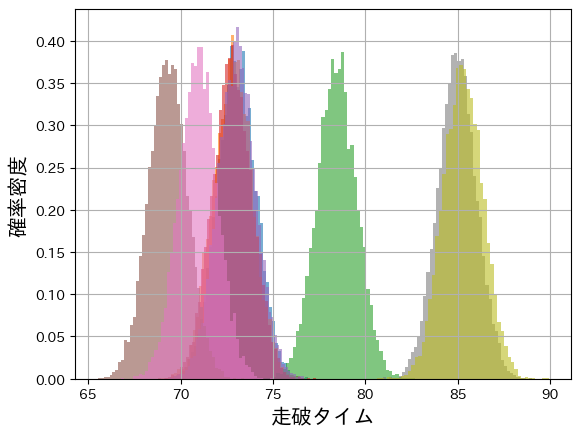

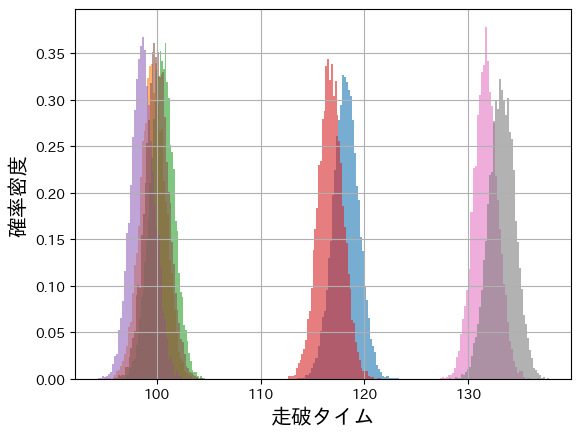

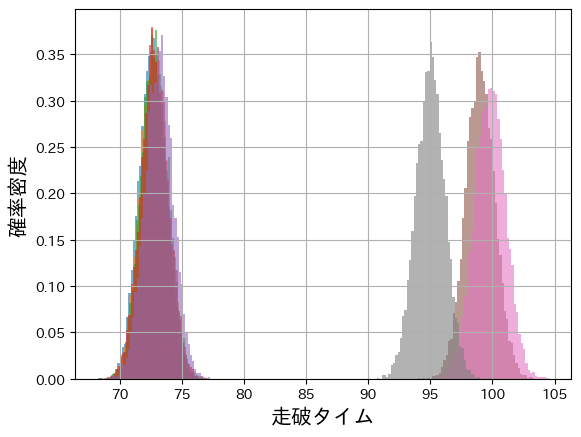

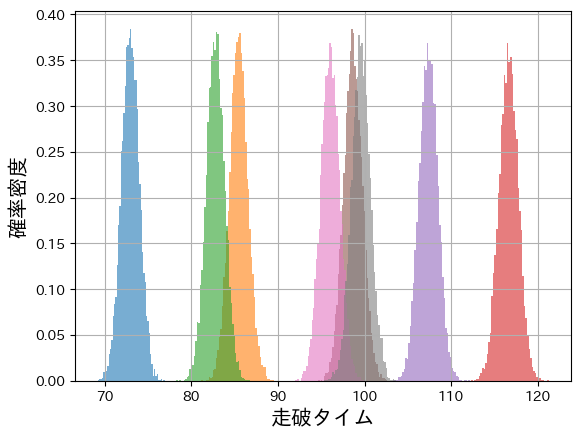

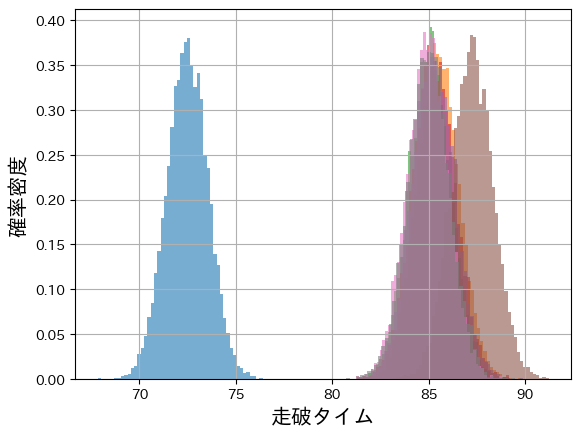

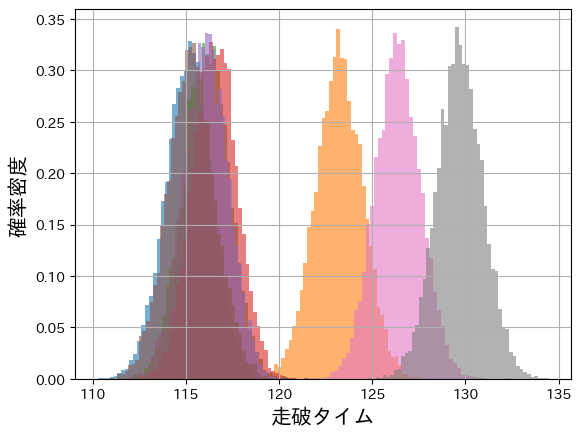

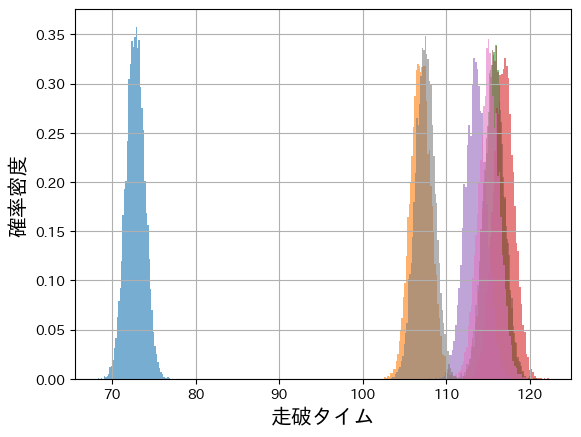

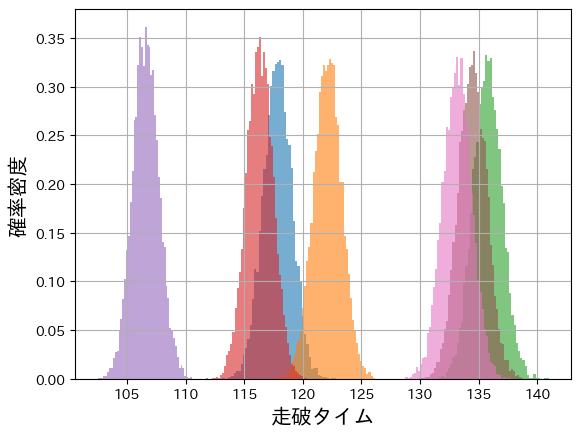

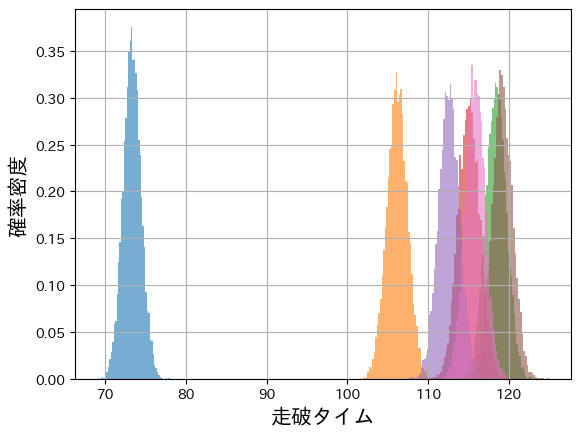

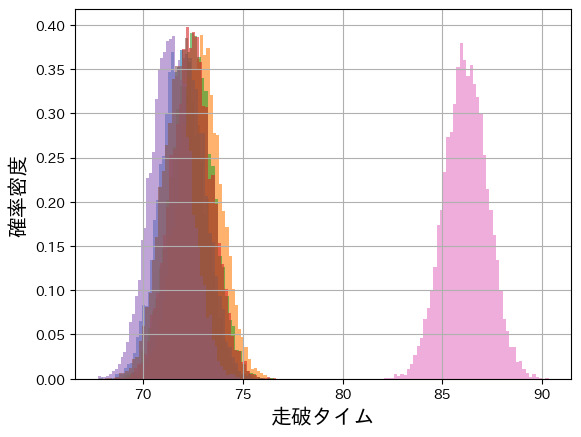

In [ ]:
# 血統登録番号が最も多く出現するものを上から10個取り出す
top_10_values = df['血統登録番号'].value_counts().head(10).index

for value in top_10_values:
  top10_df = df[df["血統登録番号"]==value]
  race_times_indv = {}
  for a in top10_df["レースID"]:
    mean = top10_df['平均'][top10_df['レースID'] == a].item()  # 平均
    std_dev = top10_df['分散'][top10_df['レースID'] == a].item()  # 標準偏差
    race_times_indv[a] = np.random.normal(mean, np.sqrt(std_dev), N)
    plt.hist(race_times_indv[a], bins=50, density=True, alpha=0.6, label=f'レースID = {a}')
  plt.xlabel('走破タイム',fontsize = 15)
  plt.ylabel('確率密度',fontsize = 15)
  plt.grid(True)
  plt.show()

# レース別のシミュレーション

In [15]:
sim_num_list = race_choicer(df,n)

In [ ]:
target_raceID = "20230318,中京,7"

In [ ]:
target_raceID = "20230617,阪神,2"

In [ ]:
target_raceID = "20230128,東京,4"

In [ ]:
sim_num_list = [target_raceID]

In [ ]:
sim_num_list.append("20230318,中京,7")
sim_num_list

['20230312,阪神,6',
 '20230513,東京,3',
 '20230107,中山,12',
 '20230304,阪神,4',
 '20230304,中山,9',
 '20230318,阪神,2',
 '20230205,東京,7',
 '20230430,東京,8',
 '20230109,中京,8',
 '20230115,小倉,12',
 '20230318,中京,7']

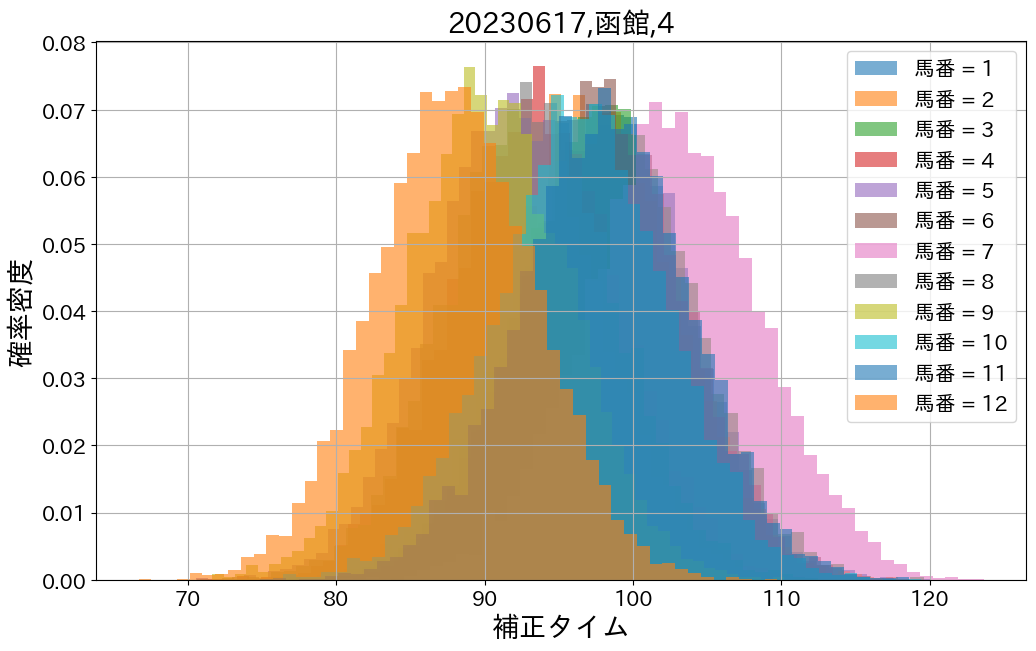

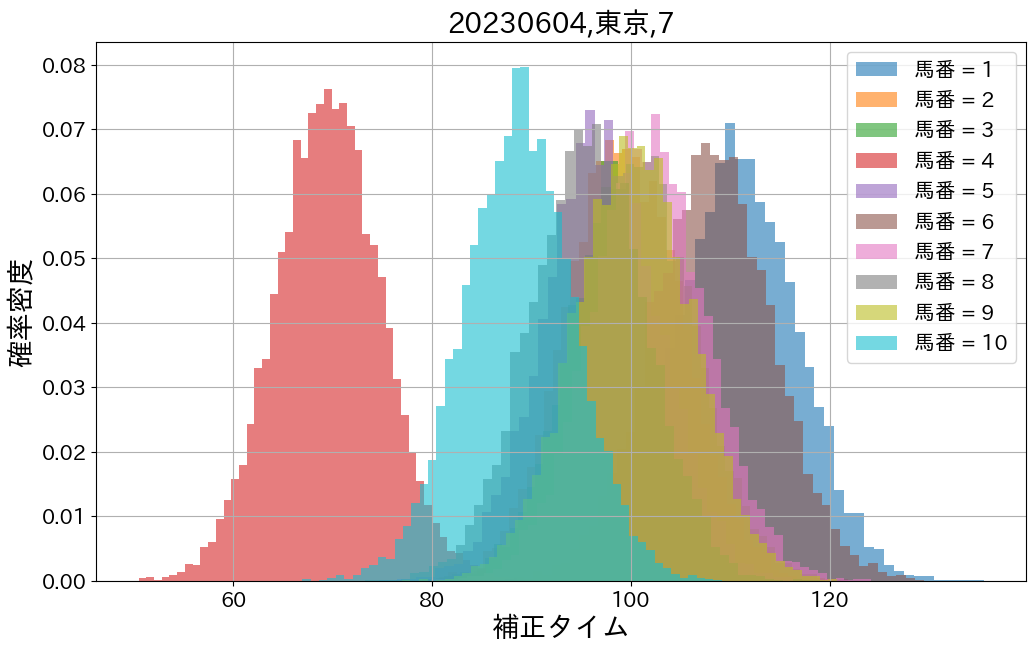

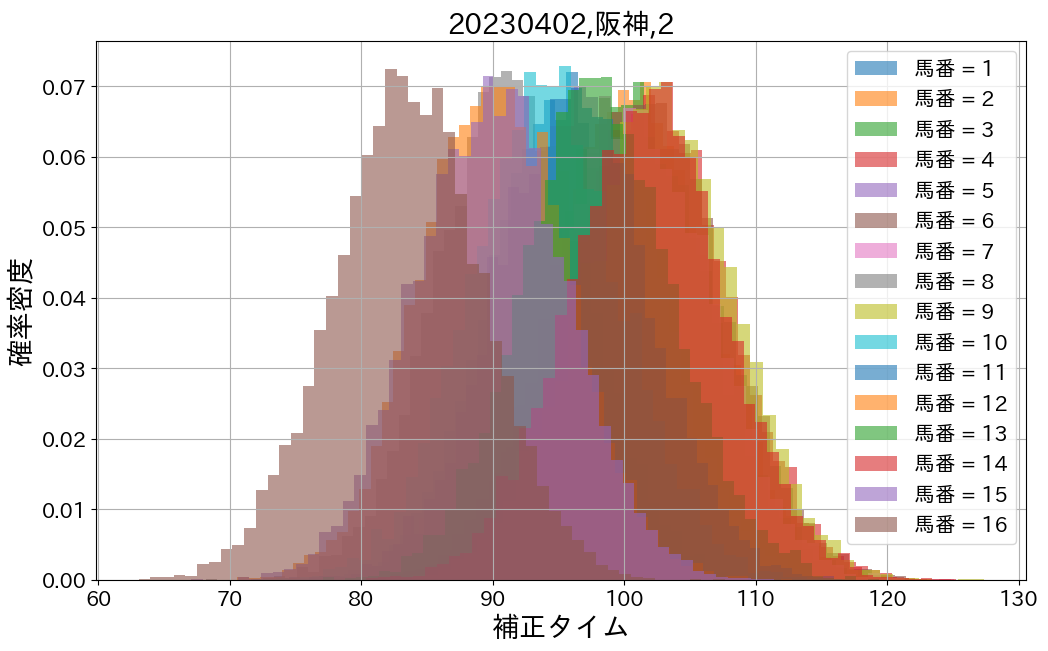

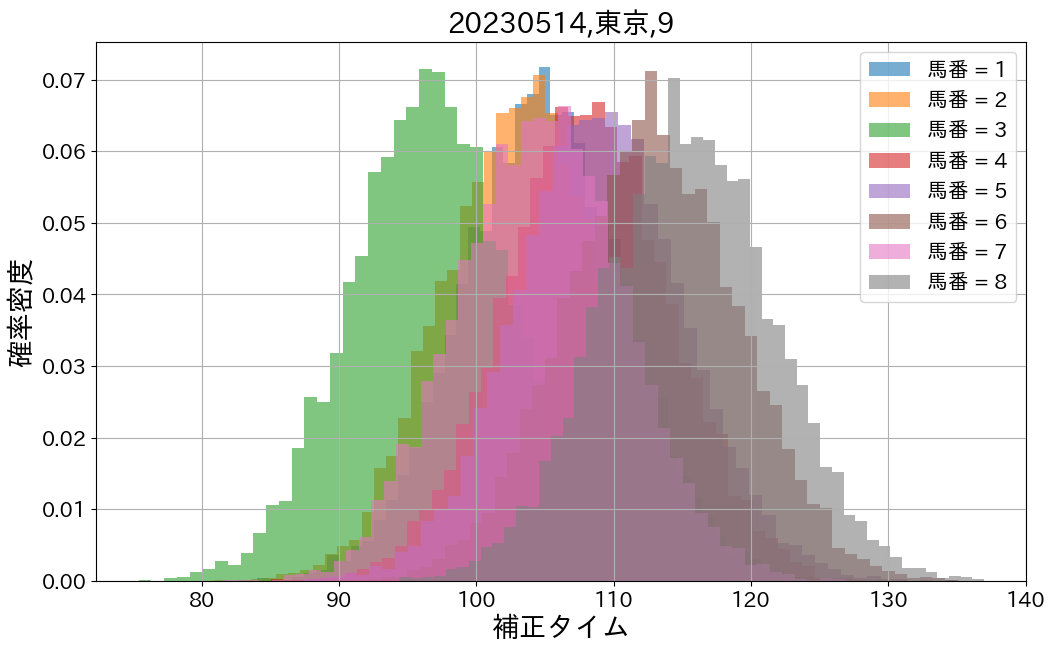

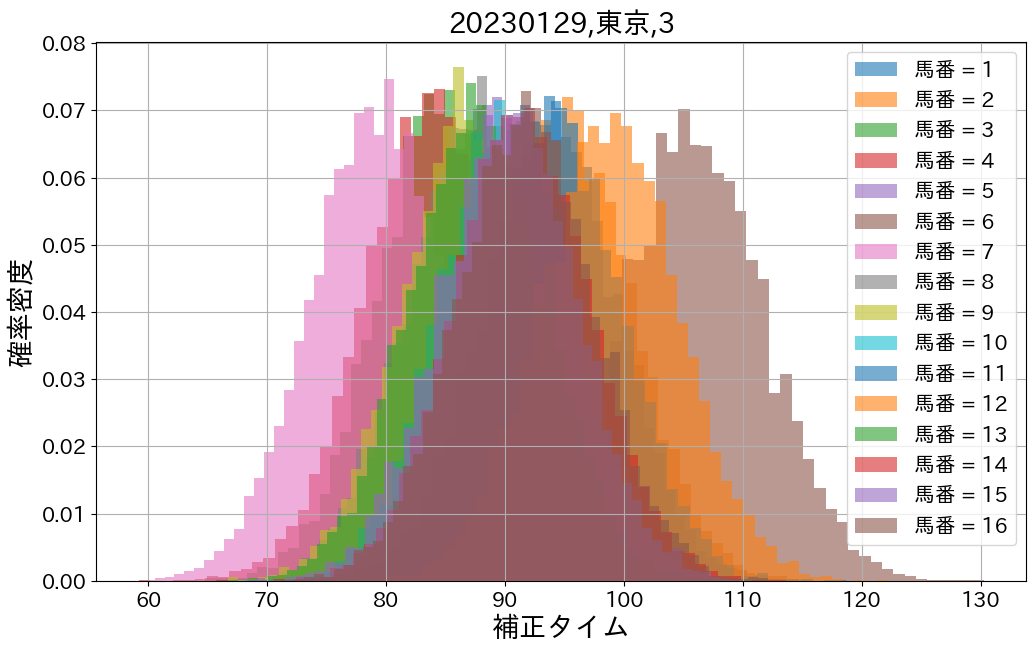

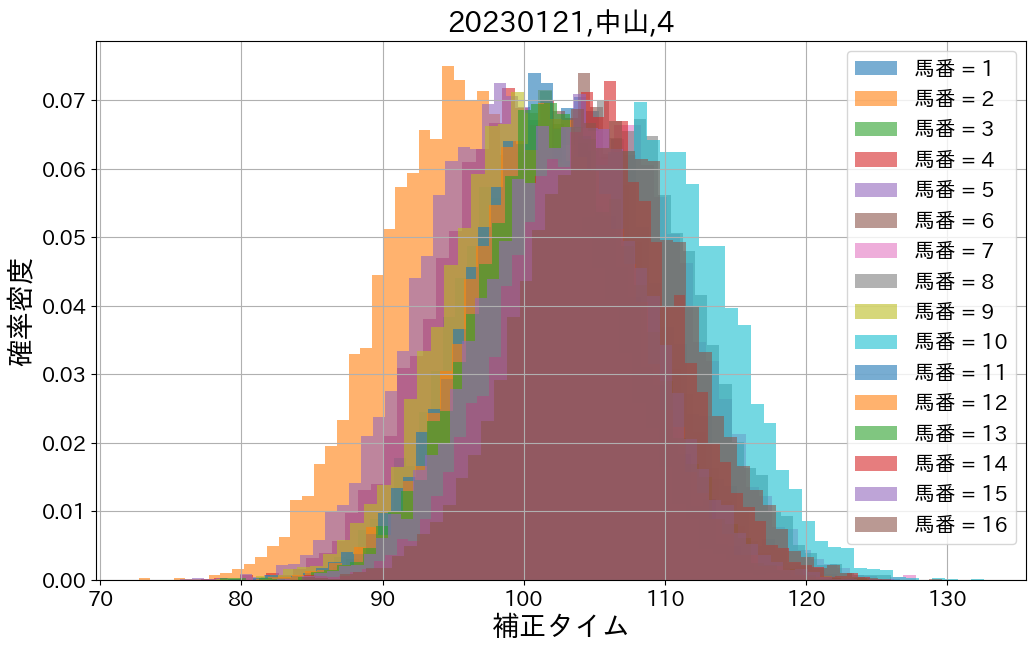

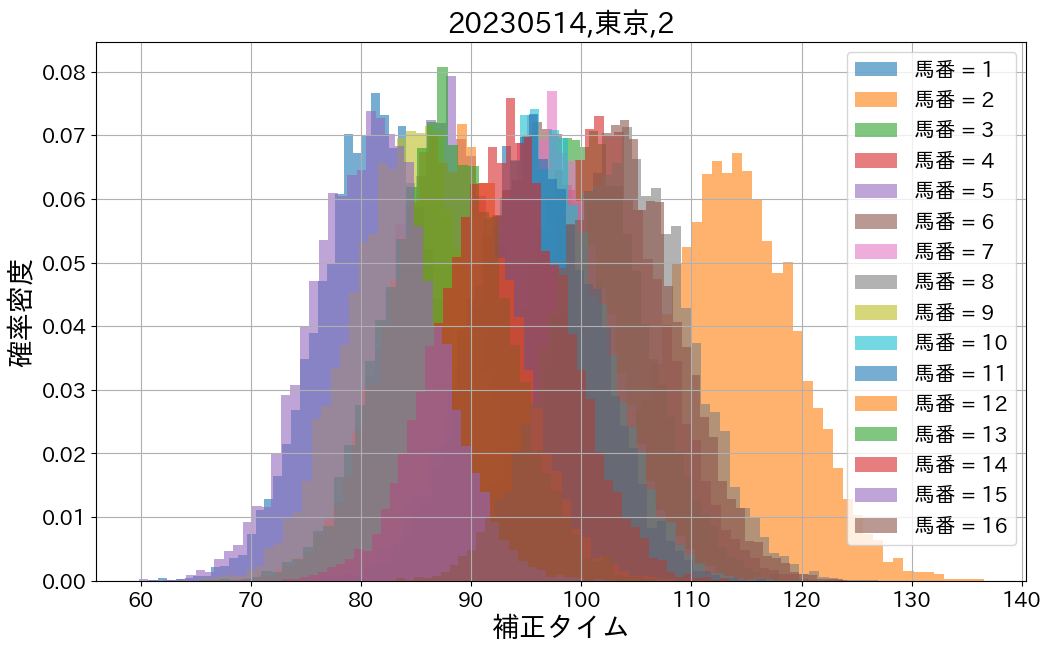

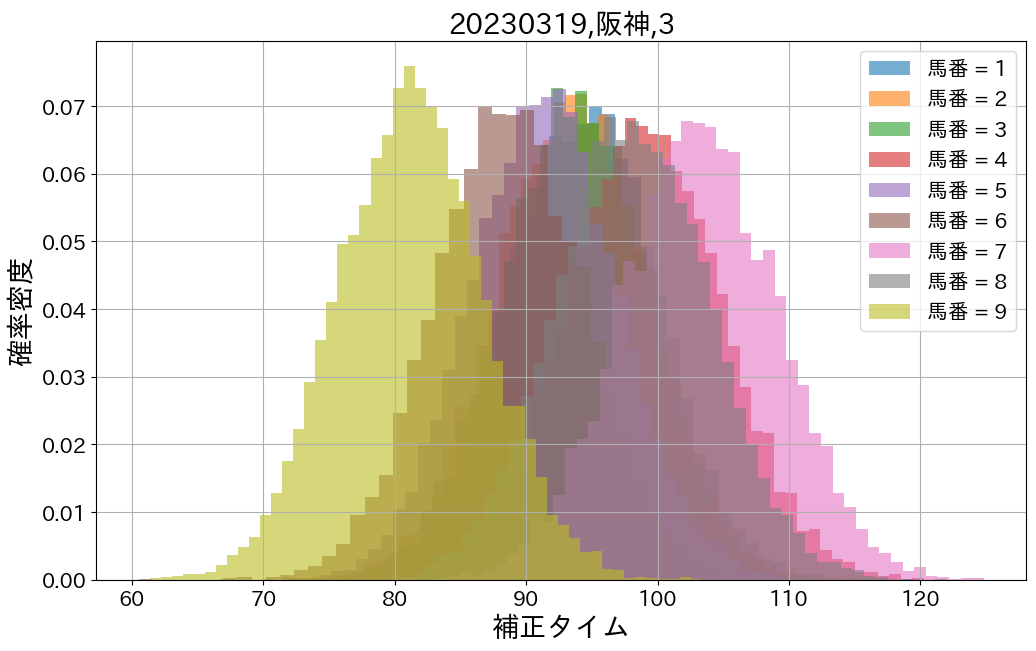

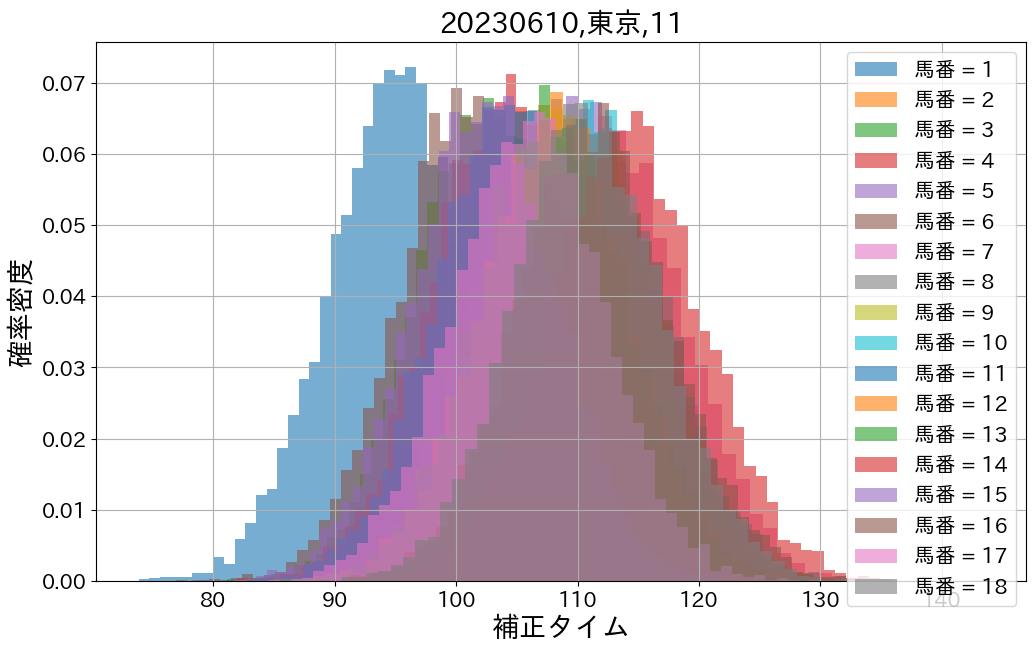

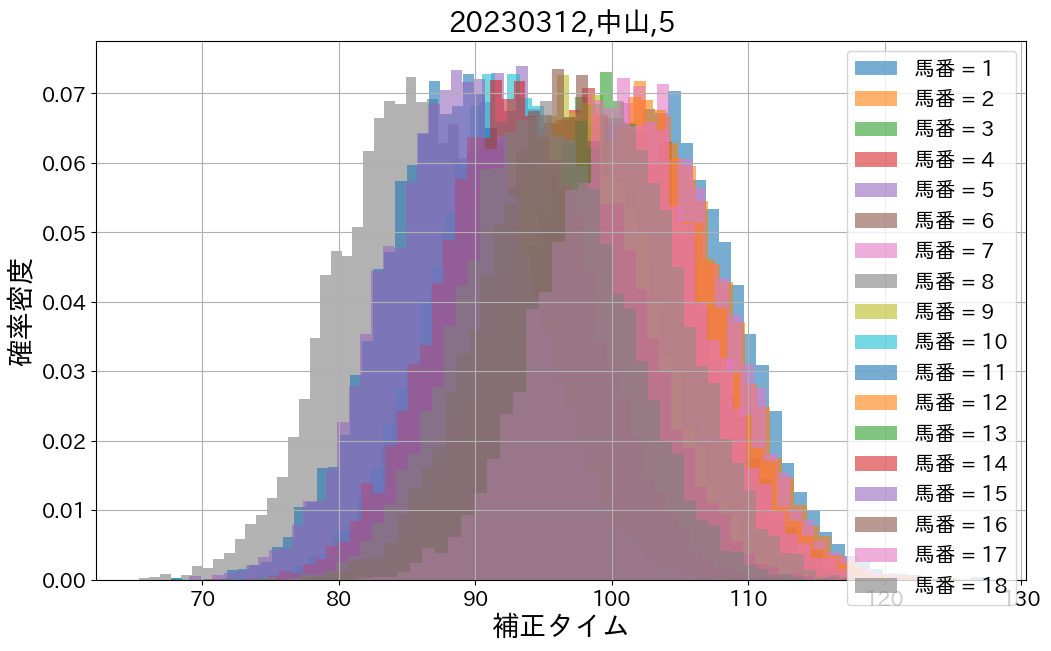

In [16]:
race_times_all = simulate_hist(df,sim_num_list)

In [ ]:
race_times_all[0][0][1][999]

98.60572863552811

In [ ]:
for array in race_times_all[0][0]:
  print(array)

In [ ]:
#馬番
num_lists = len(race_times_all[0][0])

# カウント用の辞書を初期化
count_max = {i: 0 for i in range(1, num_lists + 1)}

N = 10000

for n in range(N):
    # 各リスト内の最大値を求める
    max_value = max(race_times_all[0][0][i][n] for i in range(1, num_lists + 1))

    # 最大値がどのリストのものであるかによってカウント
    for i in range(1, num_lists + 1):
        if max_value == race_times_all[0][0][i][n]:
            count_max[i] += 1

#結果を格納
df_sim_tansyo = pd.DataFrame(list(count_max.items()), columns=["馬番", "1着回数"])
df_sim_tansyo["勝率[%]"] = df_sim_tansyo["1着回数"]/N*100
df_sim_tansyo

,馬番,1着回数,勝率[%]
0,1,166,1.66
1,2,50,0.50
2,3,139,1.39
3,4,66,0.66
4,5,492,4.92
5,6,473,4.73
6,7,0,0.00
7,8,58,0.58
8,9,658,6.58
9,10,366,3.66


In [ ]:
latex_code = df_sim_tansyo.to_latex(index=False)

# LaTeXコードの表示
print(latex_code)

\begin{tabular}{rrr}
\toprule
 馬番 &  1着回数 &  勝率[\%] \\
\midrule
  1 &   166 &   1.66 \\
  2 &    50 &   0.50 \\
  3 &   139 &   1.39 \\
  4 &    66 &   0.66 \\
  5 &   492 &   4.92 \\
  6 &   473 &   4.73 \\
  7 &     0 &   0.00 \\
  8 &    58 &   0.58 \\
  9 &   658 &   6.58 \\
 10 &   366 &   3.66 \\
 11 &   146 &   1.46 \\
 12 &    21 &   0.21 \\
 13 &  6046 &  60.46 \\
 14 &   241 &   2.41 \\
 15 &   228 &   2.28 \\
 16 &   850 &   8.50 \\
\bottomrule
\end{tabular}



<ipython-input-173-eda57b4b7304>:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_code = df_sim_tansyo.to_latex(index=False)


#特定のレースの正規分布

In [ ]:
target_ID = "20230128,東京,4"
target_df = df[df["レースID"]==target_ID]

In [ ]:
target_ID = "20230617,阪神,2"
target_df = df[df["レースID"]==target_ID]

In [17]:
target_ID = "20230401,中山,3"
target_df = df[df["レースID"]==target_ID]

In [18]:
target_df

,場所,開催何日目,芝・ダート,距離,馬場状態,血統登録番号,斤量,基準タイム,補正タイム総合値_noleak,レース番号,馬番,レースID,rpr_逃げ,rpr_先行,rpr_中団,rpr_後方,平均,分散
74023,1,3,1,1800,2,2020104518,56.0,116.2507,110.9673,3,1,"20230401,中山,3",0.00,0.00,1.000,0.000,100.238022,36.989933
74024,1,3,1,1800,2,2020100675,56.0,116.2507,83.6330,3,2,"20230401,中山,3",0.00,0.00,0.000,1.000,82.385162,32.612385
74025,1,3,1,1800,2,2020105850,56.0,116.2507,90.0138,3,3,"20230401,中山,3",0.00,0.00,0.500,0.500,96.462234,34.209766
74026,1,3,1,1800,2,2020104766,56.0,116.2507,98.7365,3,4,"20230401,中山,3",0.00,0.00,1.000,0.000,101.392868,36.691761
74027,1,3,1,1800,2,2020101351,55.0,116.2507,87.8185,3,5,"20230401,中山,3",0.00,0.00,0.000,1.000,96.245804,35.493706
74028,1,3,1,1800,2,2020103933,56.0,116.2507,80.8975,3,6,"20230401,中山,3",0.00,0.00,0.000,1.000,83.583824,32.855812
74029,1,3,1,1800,2,2020101510,53.0,116.2507,76.4731,3,7,"20230401,中山,3",0.00,0.00,0.500,0.500,88.818954,32.852150
74030,1,3,1,1800,2,2020103289,56.0,116.2507,111.1210,3,8,"20230401,中山,3",0.00,0.50,0.500,0.000,111.954697,38.738377
74031,1,3,1,1800,2,2020101983,56.0,116.2507,94.5875,3,9,"20230401,中山,3",0.25,0.25,0.250,0.250,100.046036,35.080379
74032,1,3,1,1800,2,2020105153,52.0,116.2507,88.9870,3,10,"20230401,中山,3",0.00,0.00,0.000,1.000,81.122475,32.118992


In [19]:
mean = target_df["平均"].tolist()
var = target_df["分散"].tolist()
stdv = [math.sqrt(x) for x in var]


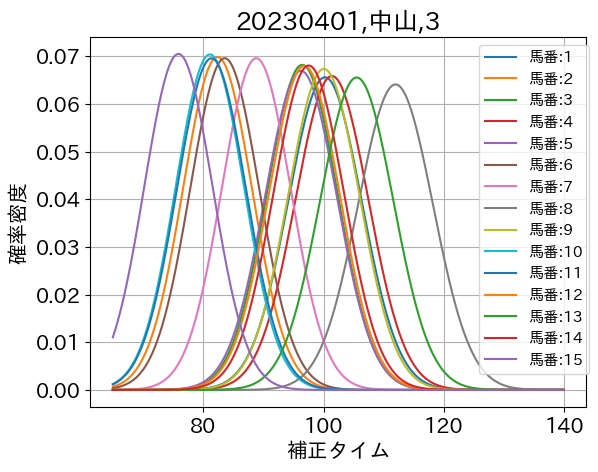

In [20]:
x = np.arange(65,140,0.1)
i=0
# 各正規分布を描画
for mu, sigma in zip(mean, stdv):
    i+=1
    pdf = norm.pdf(x, mu, sigma)
    plt.plot(x, pdf, label=f'馬番:{i}')


# ラベルや凡例の設定
plt.title(target_ID)

plt.xlabel('補正タイム',fontsize = 15)
plt.ylabel('確率密度',fontsize = 15)
plt.legend(loc='upper right', bbox_to_anchor=(1.02, 1),fontsize = 11)
plt.grid(True)


# グラフの表示
plt.show()

# 馬別のシミュレーション

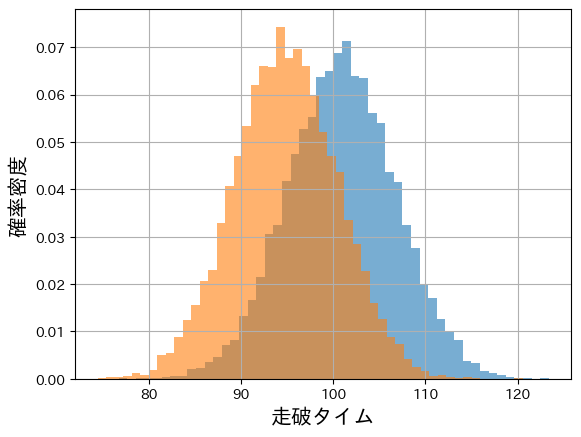

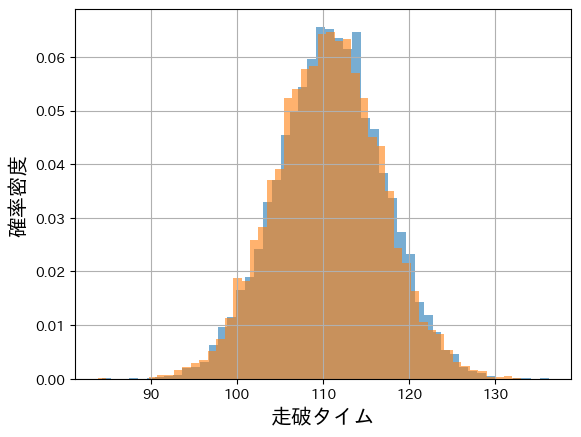

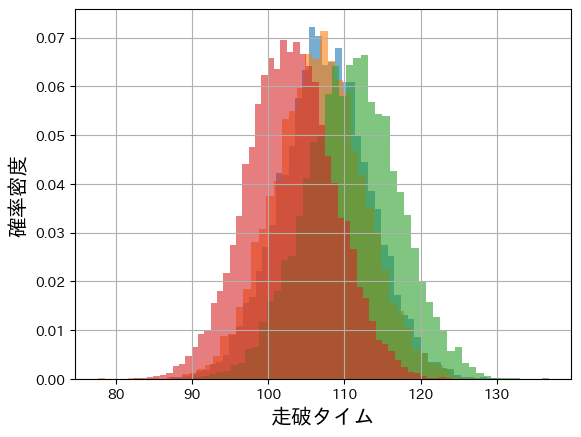

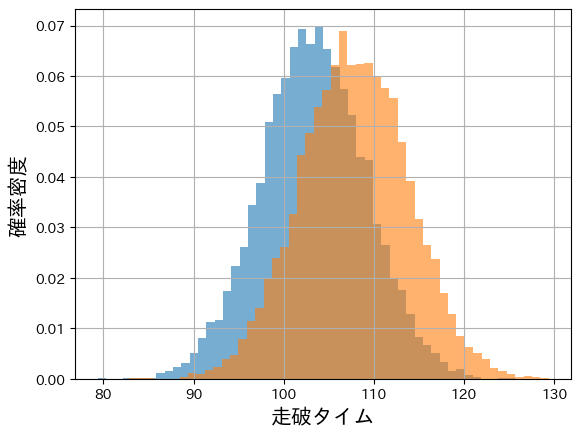

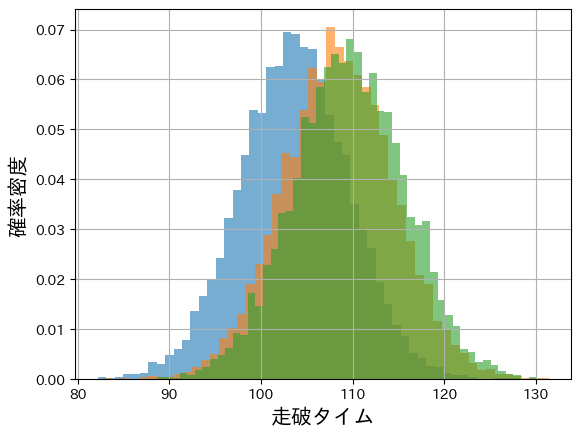

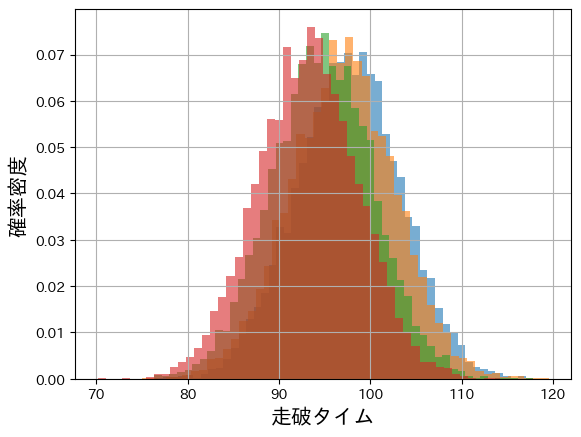

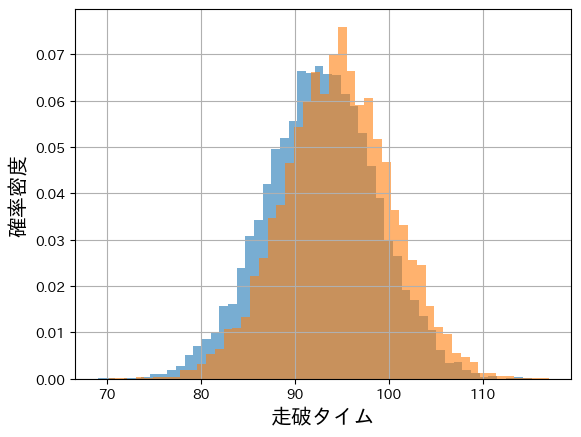

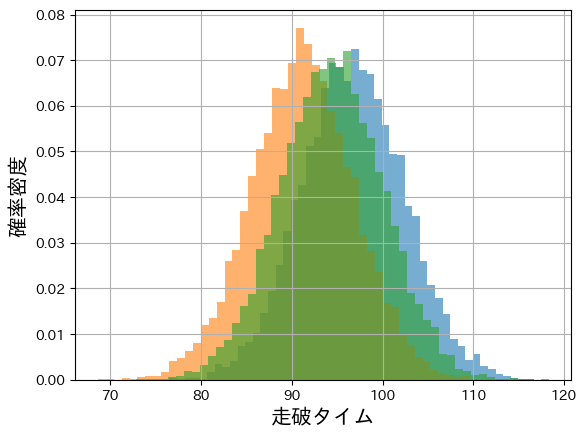

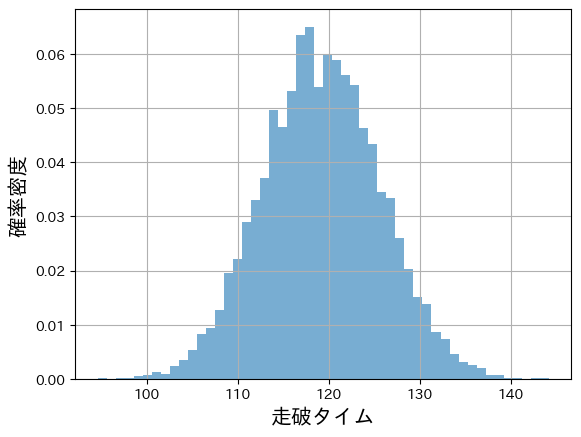

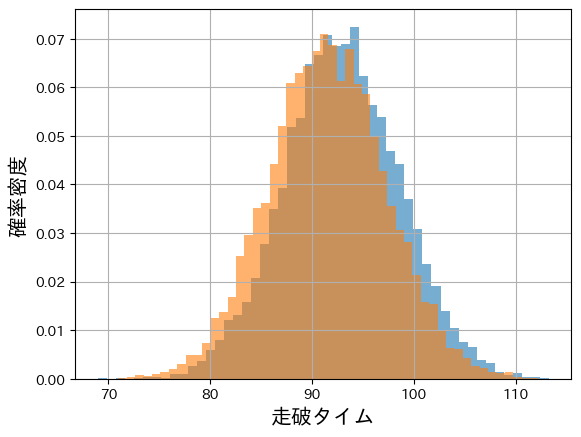

In [ ]:
for value in random_10_values:
  top10_df = df[df["血統登録番号"]==value]
  race_times_indv = {}
  for a in top10_df["レースID"]:
    mean = top10_df['平均'][top10_df['レースID'] == a].item()  # 平均
    std_dev = top10_df['分散'][top10_df['レースID'] == a].item()  # 標準偏差
    race_times_indv[a] = np.random.normal(mean, np.sqrt(std_dev), N)
    plt.hist(race_times_indv[a], bins=50, density=True, alpha=0.6, label=f'レースID = {a}')
  plt.xlabel('走破タイム',fontsize = 15)
  plt.ylabel('確率',fontsize = 15)
  plt.grid(True)
  plt.show()

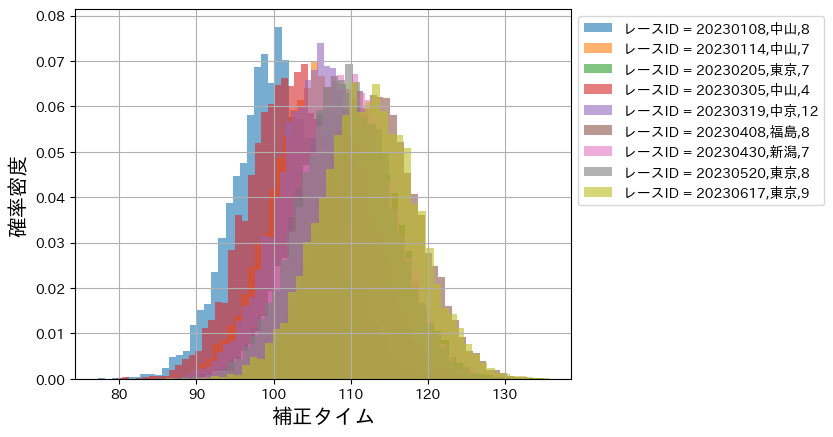

In [ ]:
top1_df = df[df["血統登録番号"]==top_1_values]
race_times_indv = {}
for a in top1_df["レースID"]:
  mean = top1_df['平均'][top1_df['レースID'] == a].item()  # 平均
  std_dev = top1_df['分散'][top1_df['レースID'] == a].item()  # 標準偏差
  race_times_indv[a] = np.random.normal(mean, np.sqrt(std_dev), N)
  plt.hist(race_times_indv[a], bins=50, density=True, alpha=0.6, label=f'レースID = {a}')
plt.xlabel('補正タイム',fontsize = 15)
plt.ylabel('確率密度',fontsize = 15)
plt.grid(True)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [ ]:
top1_df

,場所,開催何日目,芝・ダート,距離,馬場状態,血統登録番号,斤量,基準タイム,補正タイム総合値_noleak,レース番号,馬番,レースID,rpr_逃げ,rpr_先行,rpr_中団,rpr_後方,平均,分散
65523,1,3,1,1200,2,2019101139,58.0,73.3760,94.3590,8,16,"20230108,中山,8",0.0,0.564331,0.183594,0.252075,72.681120,0.675526
66100,1,5,1,1200,2,2019101139,58.0,73.5591,102.0595,7,4,"20230114,中山,7",0.0,0.564331,0.183594,0.252075,73.001476,0.654163
69211,6,4,1,1300,2,2019101139,58.0,79.4541,107.8252,7,4,"20230205,東京,7",0.0,0.564331,0.183594,0.252075,78.838289,0.671136
72081,1,4,1,1200,2,2019101139,58.0,73.2418,99.6831,4,10,"20230305,中山,4",0.0,0.564331,0.183594,0.252075,72.507914,0.672694
73622,0,4,1,1200,1,2019101139,58.0,73.7851,102.0506,12,12,"20230319,中京,12",0.0,0.564331,0.183594,0.252075,73.532879,0.614698
74713,7,1,1,1150,2,2019101139,58.0,70.5903,111.9508,8,4,"20230408,福島,8",0.0,0.564331,0.183594,0.252075,69.908036,0.564361
76644,4,2,1,1200,3,2019101139,55.0,71.8746,115.9269,7,14,"20230430,新潟,7",0.0,0.564331,0.183594,0.252075,71.558085,0.623387
78080,6,9,1,1400,1,2019101139,58.0,85.9133,108.3364,8,9,"20230520,東京,8",0.0,0.564331,0.183594,0.252075,85.712748,0.654104
79918,6,5,1,1400,2,2019101139,58.0,86.6420,114.7347,9,13,"20230617,東京,9",0.0,0.564331,0.183594,0.252075,85.778859,0.715293
